In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as d
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Entropy vs Probability

/mnt/xvdb/jupyter/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  
/mnt/xvdb/jupyter/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


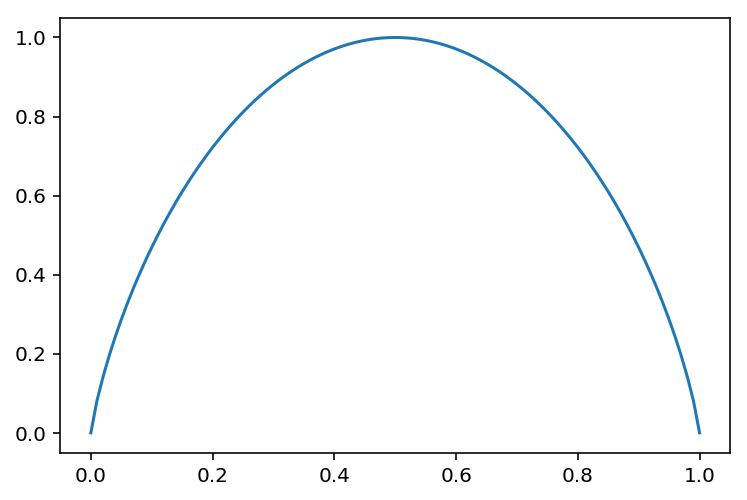

In [2]:
x = np.linspace(0, 1, 101)
y = -x * np.log2(x) - (1-x) * np.log2(1-x)
y[np.isnan(y)] = 0
plt.plot(x, y)

# KL Analysis

$$ KL(\mu_1, \sigma_1) = -log\sigma_1 + \frac{\sigma_1^2 + \sigma_2^2}{2} - \frac{1}{2} $$

1. $\sigma_1 > 1$, which side $\frac{1}{2} \sigma_1^2$ (increasing) and $-log\sigma_1$ (decreasing) will be more impact? 
2. $\sigma_1 < 1$,  which side $\frac{1}{2} \sigma_1^2$ (decreasing) and $-log\sigma_1$ (increasing) will be more impact? 

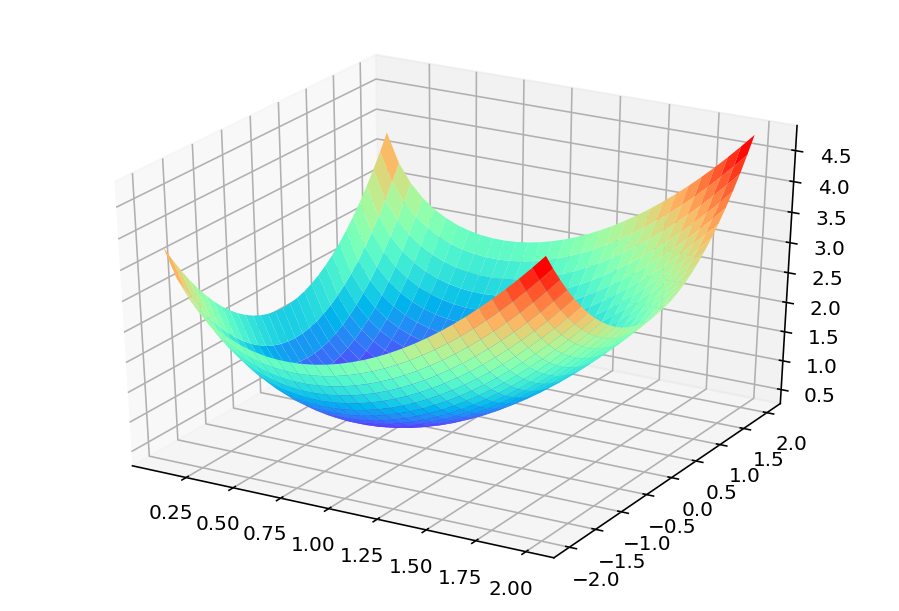

In [3]:
fig = plt.figure()
ax = Axes3D(fig)
# don't start with 0, as it will lead to log(0) 
x = np.linspace(0.1, 2, 31)
y = np.linspace(-2, 2, 31)
X, Y = np.meshgrid(x, y)
Z = -np.log(X) + X*X + Y*Y / 2 - 0.5
# refer to https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
# The rstride and cstride kwargs set the stride used to sample the input data to generate the graph. 
# If 1k by 1k arrays are passed in, the default values for the strides will result in a 100x100 grid being plotted. 
# Defaults to 10. Raises a ValueError if both stride and count kwargs (see next section) are provided.
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
plt.show()

# Regression and Classification

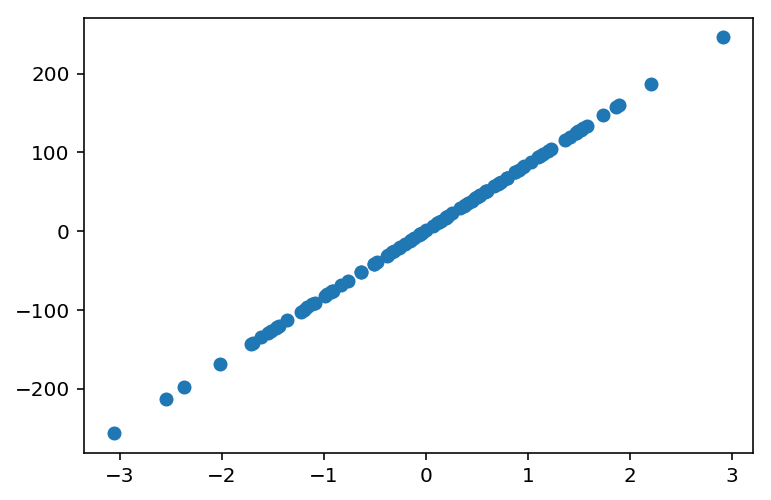

In [4]:
reg_data = d.make_regression(100, 1, 1, 1, 1.0)
plt.plot(reg_data[0], reg_data[1], 'o')

In [5]:
reg_data

(array([[ 8.80395737e-01],
        [ 9.15374258e-01],
        [-3.70298159e-01],
        [-1.22619919e+00],
        [-1.45846168e+00],
        [ 3.74339183e-01],
        [ 1.15035717e+00],
        [ 5.20809092e-01],
        [-5.43771057e-02],
        [ 7.99112507e-01],
        [ 9.56815047e-01],
        [ 1.09055258e-01],
        [-4.79429757e-01],
        [-1.11295532e+00],
        [-1.35950981e+00],
        [ 3.87820751e-01],
        [-1.61236431e+00],
        [ 1.20214800e+00],
        [ 1.03393054e+00],
        [ 4.83424323e-01],
        [ 1.47384022e+00],
        [ 2.21188894e+00],
        [-6.34951742e-01],
        [ 1.52207026e+00],
        [-9.09437884e-01],
        [ 7.33641355e-02],
        [ 1.47118236e+00],
        [ 1.10341903e+00],
        [ 5.91508518e-01],
        [-1.44063194e+00],
        [ 1.48524748e+00],
        [ 2.13930455e-01],
        [ 7.05996574e-01],
        [ 1.96035308e-01],
        [ 1.11886482e+00],
        [ 8.79270149e-01],
        [ 5.91147557e-01],
 

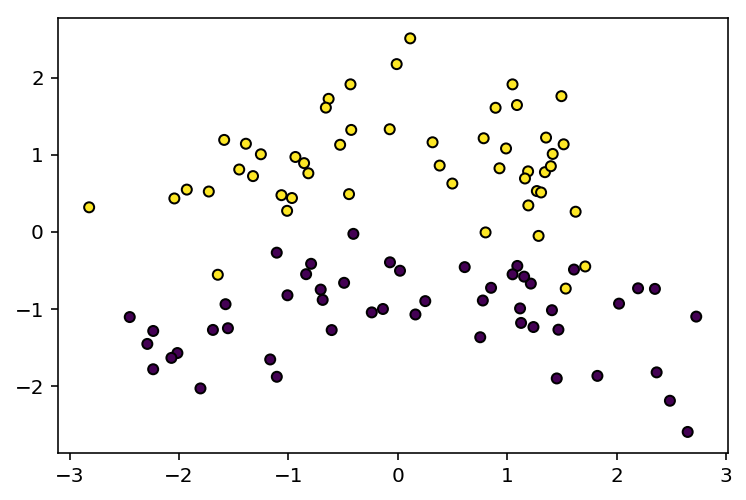

In [6]:
X1, Y1 = d.make_classification(100, 2, 2, 0, 0, 2)
## why plt.plot could paint the scatter graphic?
#  refer to http://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')

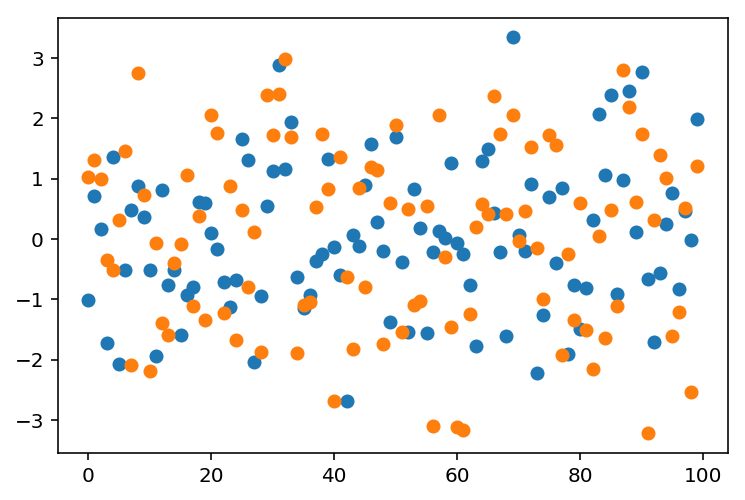

In [7]:
cls_data = d.make_classification(100, 2, 2, 0, 0, 2)
cls0, cls1 = plt.plot(cls_data[0], 'o')

# Bonouli Distribution

$P$ and $Q$ conform to Bonouli Distribution, How about cross-entropy?

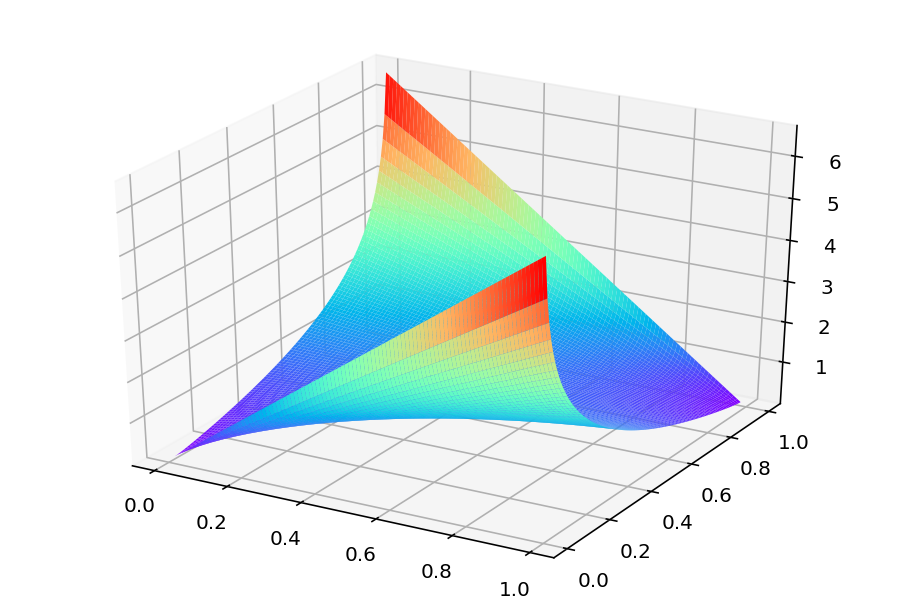

In [8]:
fig = plt.figure()
ax = Axes3D(fig)
X = np.linspace(0.01, 0.99, 101)
Y = np.linspace(0.01, 0.99, 101)
X, Y = np.meshgrid(X, Y)
Z = -X * np.log2(Y) - (1-X) * np.log2(1-Y)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')